# Sesion 1: Pilot

<img src="https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/Sesiones/Sesion1/images/poster.png" alt="drawing" width="300"/>

**IMPORTANTE**
si realizas cambios en este notebook en colab es necesario que hagas commit antes de cerrar la pestaña, si no se perderan los cambios, porfavor, manten abierta la pestaña




In [7]:
# @title imports
import matplotlib.pyplot as plt
import numpy as np
import requests
from PIL import Image
from transformers import pipeline, CLIPProcessor, CLIPModel

In [2]:
# @title Rellena estos campos
nombre = "" # @param {type:"string"}
codigo = "" # @param {type:"string"}

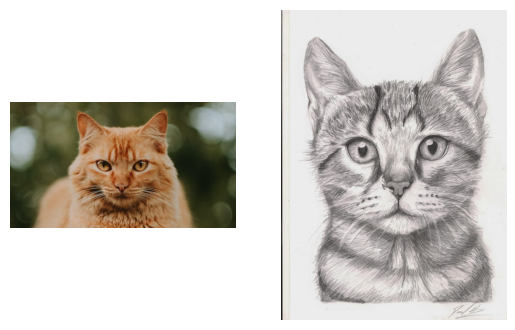

In [12]:
# @title cargar imagen
url1 = "https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/Sesiones/Sesion1/images/gato.jpg"

url2 = "https://i.pinimg.com/736x/1c/cc/2d/1ccc2da4adeead37d2b6e336cd38097e.jpg"
# puedes poner urls de internet!

img1 = Image.open(requests.get(url1, stream=True).raw)
img2 = Image.open(requests.get(url2, stream=True).raw)


plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis("off")

plt.show()

In [13]:
# @title clasificar imagen
classifier = pipeline('image-classification')
result1 = classifier(url1)
result2 = classifier(url2)

print(f"\n **La imagen es un: {result1[0]['label']}** ")
print(f"\n **La imagen es un: {result2[0]['label']}** ")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 3f49326 (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.
Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu



 **La imagen es un: tiger cat** 

 **La imagen es un: tabby, tabby cat** 


In [20]:
#@title usando otro clasificador como CLIP!

clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
text_labels = ["cat", "dog", "tree", "drawing of a cat", "drawing of a dog"] #puedes poner las labels que quieras


#procesar imagenes y texto
inputs = clip_processor(text=text_labels, images=[img1, img2], return_tensors="pt", padding=True)
outputs = clip_model(**inputs)

#obtener probabilidades
clip_probs = outputs.logits_per_image.softmax(dim=1)

for i, img_name in enumerate(["Imagen 1", "Imagen 2"]):
    img_probs=clip_probs[i]
    index = img_probs.argmax().item()
    label = text_labels[index]
    prob = img_probs[index].item()
    print(f"\n La {img_name} es: {label} ({prob:.4f})")



 La Imagen 1 es: cat (0.9252)

 La Imagen 2 es: drawing of a cat (0.9908)


## Guarda tus cambios en el repositorio

todos tus cambios se guardan en tu repostorio que esta ligado a tu cuenta en github, asi podras llevar un registro a lo largo del tiempo de lo que has hecho

**para realizarlo es necesario hacer lo siguientes pasos:**



1. En la barra de herramientas selecciona file o archivo y dale en la opcion **Save a copy in github**


![step1](https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/Sesiones/Sesion1/images/step1.png)


2. Se te mostrara el siguiente menu, en el que debes checkear el repositorio y poner un mensaje de los cambios que hiciste, puedes poner algo como: *mi primer commit*

![step1](https://raw.githubusercontent.com/semilleroCV/Hands-on-Computer-Vision/main/Sesiones/Sesion1/images/step2.png)

3. Al darle en ok, se te guardaran los cambios

**IMPORTANTE**

es necesario que revises que los cambios se guardaron correctamente en tu github
